# Загрузка библиотек, данных и предварительный анализ

In [ ]:
%matplotlib inline

import seaborn as sns # Будем визулизировать данные этой библиотекой
import pandas as pd # Библиотека для работы с датафреймом
import numpy as np # Библиотека для работы с массивами
import matplotlib.pyplot as plt # Будем визулизировать данные этой библиотекой

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

In [ ]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 7

In [ ]:
df = pd.read_excel('/content/drive/My Drive/ML/тестовое задание/Тестотвое задание BND.xlsx')
df.head()

Номер машины Дата смены  Отчетная смена Суммарное время маршрутов  \
0            46 2022-10-23               1                  00:00:00   
1            46 2022-10-24               2                  00:00:00   
2            46 2022-10-25               1                  00:01:00   
3            46 2022-10-26               2                  00:00:00   
4            46 2022-10-27               1                  00:01:00   

   Кол. маршрутов  Объем по данным контроллера ИПЭ-13, м3  \
0               0                                       0   
1               0                                       0   
2               0                                       0   
3               0                                       0   
4               0                                       0   

   Наполнение, м3/кузов  Коэффициент наполнения кузова  Цикличность, секунд  \
0                   NaN                            NaN                  NaN   
1                   NaN                            NaN                  NaN   
2                   NaN                            NaN                  NaN   
3                   NaN                            NaN                  NaN   
4                   NaN                            NaN                  NaN   

   Unnamed: 9                                             Задача  
0         NaN  На карьерном самосвале установлен датчик ИПЭ-1...  
1         NaN                                                NaN  
2         NaN                                                NaN  
3         NaN                                                NaN  
4         NaN                                                NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Номер машины                            52 non-null     int64         
 1   Дата смены                              52 non-null     datetime64[ns]
 2   Отчетная смена                          52 non-null     int64         
 3   Суммарное время маршрутов               52 non-null     object        
 4   Кол. маршрутов                          52 non-null     int64         
 5   Объем по данным контроллера ИПЭ-13, м3  52 non-null     int64         
 6   Наполнение, м3/кузов                    42 non-null     float64       
 7   Коэффициент наполнения кузова           42 non-null     float64       
 8   Цикличность, секунд                     42 non-null     float64       
 9   Unnamed: 9                              0 non-null      

In [ ]:
df.isna().sum()

Номер машины                               0
Дата смены                                 0
Отчетная смена                             0
Суммарное время маршрутов                  0
Кол. маршрутов                             0
Объем по данным контроллера ИПЭ-13, м3     0
Наполнение, м3/кузов                      10
Коэффициент наполнения кузова             10
Цикличность, секунд                       10
Unnamed: 9                                52
Задача                                    51
dtype: int64

In [ ]:
df.drop(['Номер машины','Задача','Unnamed: 9'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.fillna(0, inplace=True)

In [ ]:
df.index = pd.to_datetime(df['Дата смены']) # Превращаем колонку 'Дата смены' в индекс
df.drop('Дата смены', axis=1, inplace=True) # Удаляем колонку 'Дата смены' из датафрейма
df.head()

Отчетная смена Суммарное время маршрутов  Кол. маршрутов  \
Дата смены                                                             
2022-10-23               1                  00:00:00               0   
2022-10-24               2                  00:00:00               0   
2022-10-25               1                  00:01:00               0   
2022-10-26               2                  00:00:00               0   
2022-10-27               1                  00:01:00               0   

            Объем по данным контроллера ИПЭ-13, м3  Наполнение, м3/кузов  \
Дата смены                                                                 
2022-10-23                                       0                   0.0   
2022-10-24                                       0                   0.0   
2022-10-25                                       0                   0.0   
2022-10-26                                       0                   0.0   
2022-10-27                                       0                   0.0   

            Коэффициент наполнения кузова  Цикличность, секунд  
Дата смены                                                      
2022-10-23                            0.0                  0.0  
2022-10-24                            0.0                  0.0  
2022-10-25                            0.0                  0.0  
2022-10-26                            0.0                  0.0  
2022-10-27                            0.0                  0.0

In [ ]:
df.describe()

Отчетная смена  Кол. маршрутов  Объем по данным контроллера ИПЭ-13, м3  \
count       52.000000       52.000000                               52.000000   
mean         1.500000      215.692308                             4090.557692   
std          0.504878      130.406535                             2541.892960   
min          1.000000        0.000000                                0.000000   
25%          1.000000      133.500000                             2139.750000   
50%          1.500000      256.000000                             4952.500000   
75%          2.000000      304.000000                             6055.750000   
max          2.000000      406.000000                             7789.000000   

       Наполнение, м3/кузов  Коэффициент наполнения кузова  \
count             52.000000                      52.000000   
mean              15.186183                       0.759309   
std                8.033228                       0.401661   
min                0.000000                       0.000000   
25%               13.964065                       0.698203   
50%               18.672989                       0.933649   
75%               20.918103                       1.045905   
max               24.333333                       1.216667   

       Цикличность, секунд  
count            52.000000  
mean             86.957586  
std              44.199838  
min               0.000000  
25%              92.363905  
50%             104.906639  
75%             112.460779  
max             138.620690

In [ ]:
df.describe(include=['O']) # # Отобразим описательные статистики нашего датафрейма ('O' - в том числе и строковые)

Суммарное время маршрутов
count                         52
unique                        40
top                     00:00:00
freq                           6

In [ ]:
df.quantile([0.95, 0.05, 0.5])

Отчетная смена  Кол. маршрутов  Объем по данным контроллера ИПЭ-13, м3  \
0.95             2.0          365.35                                 6987.25   
0.05             1.0            0.00                                    0.00   
0.50             1.5          256.00                                 4952.50   

      Наполнение, м3/кузов  Коэффициент наполнения кузова  Цикличность, секунд  
0.95             22.488716                       1.124436           122.387235  
0.05              0.000000                       0.000000             0.000000  
0.50             18.672989                       0.933649           104.906639

# Анализ зависимостей

## Дата смены

In [ ]:
month_set = df[df.index.month == 11]
month_set

Отчетная смена Суммарное время маршрутов  Кол. маршрутов  \
Дата смены                                                             
2022-11-01               2                  07:08:00             220   
2022-11-02               1                  06:57:00             237   
2022-11-03               2                  09:22:00             333   
2022-11-04               1                  05:38:00             217   
2022-11-05               2                  09:52:00             297   
2022-11-06               1                  08:37:00             302   
2022-11-07               2                  08:47:00             285   
2022-11-08               1                  07:23:00             251   
2022-11-09               2                  09:26:00             325   
2022-11-10               1                  00:00:00               0   
2022-11-11               2                  05:27:00             165   
2022-11-12               1                  08:24:00             280   
2022-11-13               2                  10:21:00             405   
2022-11-14               1                  07:27:00             269   
2022-11-15               2                  06:56:00             261   
2022-11-16               1                  00:01:00               0   
2022-11-17               2                  10:01:00             333   
2022-11-18               1                  10:23:00             367   
2022-11-19               2                  08:56:00             287   
2022-11-20               1                  07:01:00             241   
2022-11-21               2                  09:35:00             325   
2022-11-22               1                  08:12:00             261   
2022-11-23               2                  09:14:00             299   
2022-11-24               1                  06:21:00             228   
2022-11-25               2                  07:51:00             283   
2022-11-26               1                  00:00:00               0   
2022-11-27               2                  00:00:00               0   
2022-11-28               1                  00:01:00               0   
2022-11-29               2                  08:05:00             245   
2022-11-30               1                  09:18:00             283   

            Объем по данным контроллера ИПЭ-13, м3  Наполнение, м3/кузов  \
Дата смены                                                                 
2022-11-01                                    4924             22.381818   
2022-11-02                                    4749             20.037975   
2022-11-03                                    5431             16.309309   
2022-11-04                                    3052             14.064516   
2022-11-05                                    5658             19.050505   
2022-11-06                                    6415             21.241722   
2022-11-07                                    5749             20.171930   
2022-11-08                                    5469             21.788845   
2022-11-09                                    7309             22.489231   
2022-11-10                                       0              0.000000   
2022-11-11                                    3585             21.727273   
2022-11-12                                    6291             22.467857   
2022-11-13                                    5896             14.558025   
2022-11-14                                    4344             16.148699   
2022-11-15                                    3744             14.344828   
2022-11-16                                       0              0.000000   
2022-11-17                                    6429             19.306306   
2022-11-18                                    7789             21.223433   
2022-11-19                                    6324             22.034843   
2022-11-20                                    4839             20.078838   
2022-11-21                         

In [ ]:
plt.figure(figsize = (15, 5)) #Указываем размер полотна
plt.hist(df.index, bins = 15) #Выводим гистограмму по датам
plt.show()

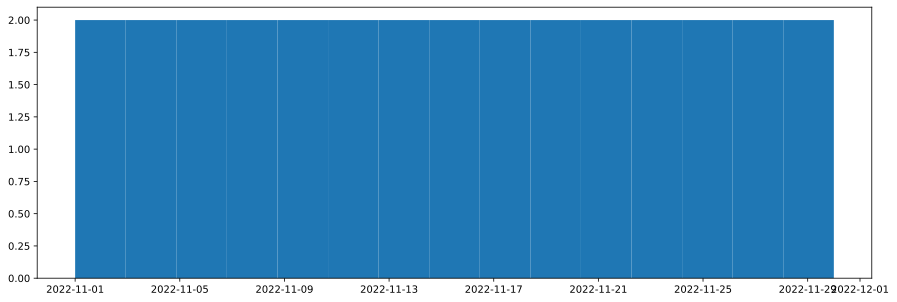

In [ ]:
plt.figure(figsize = (15, 5)) #Указываем размер полотна
plt.hist(month_set.index, bins = 15) #Выводим гистограмму по датам
plt.show()

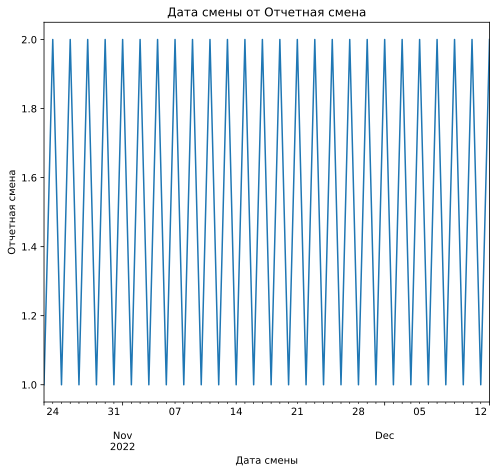

0


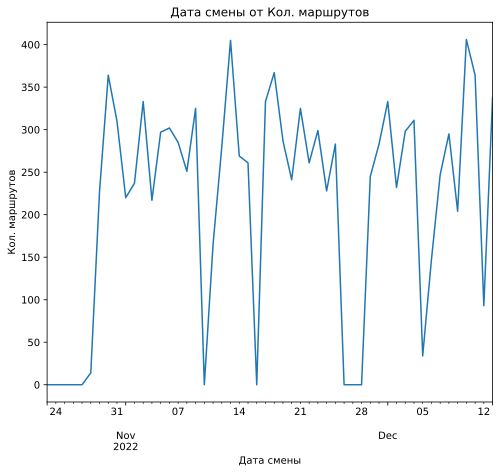

1


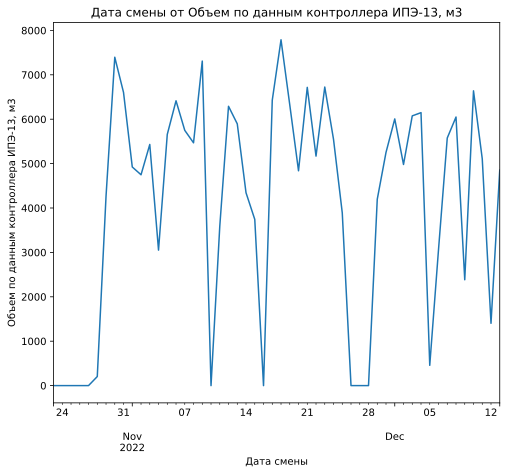

2


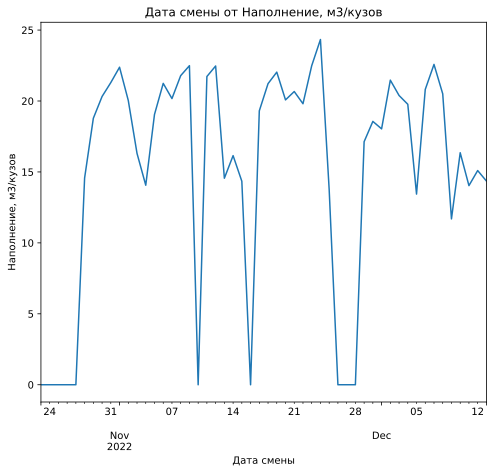

3


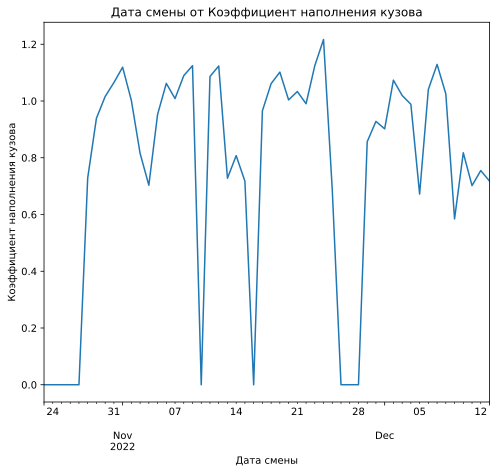

4


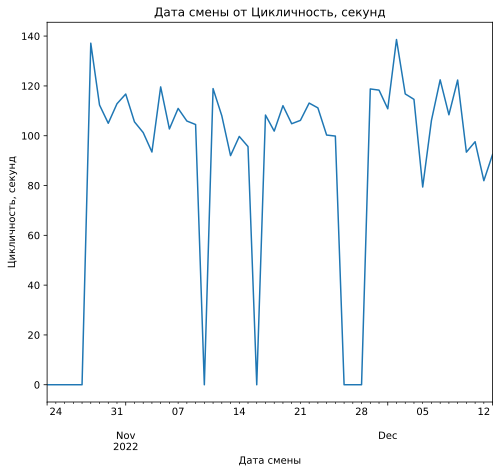

5


In [ ]:
data = df.drop(df.columns[[1]],axis = 1)
for i in range(len(data.columns)):
  df.groupby(df.index.name)[data.columns[i]].mean().plot()
  plt.title(df.index.name+' от '+data.columns[i])
  plt.xlabel(df.index.name)
  plt.ylabel(data.columns[i])
  plt.show()
  print(i)

## Суммарное время маршрутов

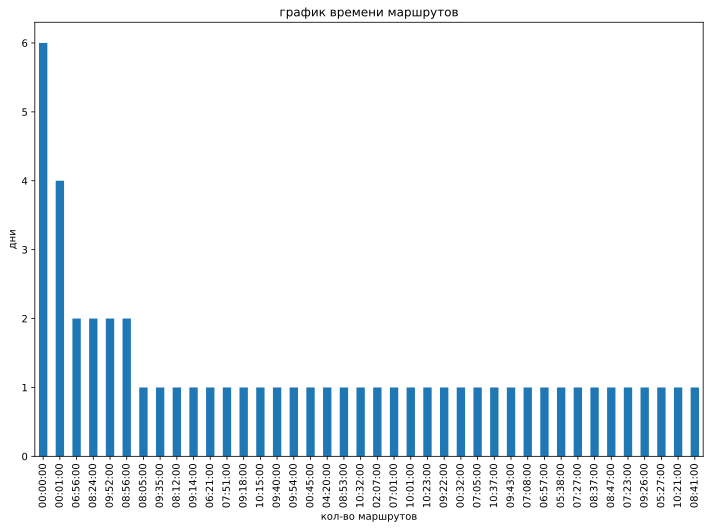

In [ ]:
df['Суммарное время маршрутов'].value_counts().plot(kind='bar')
plt.title('график времени маршрутов')
plt.xlabel('кол-во маршрутов') #Подписываем ось x
plt.ylabel('дни') #Подписываем ось y
plt.show()

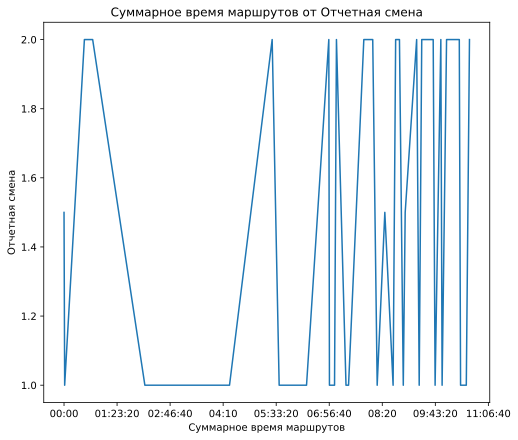

0


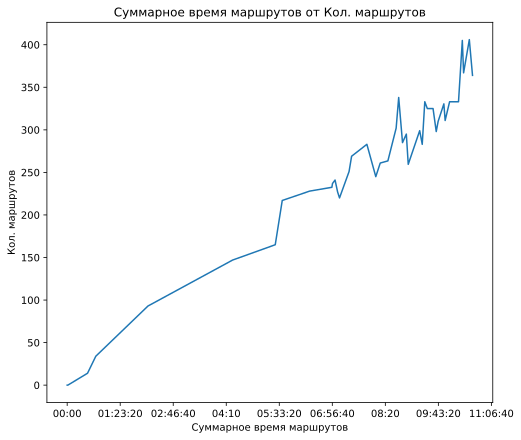

1


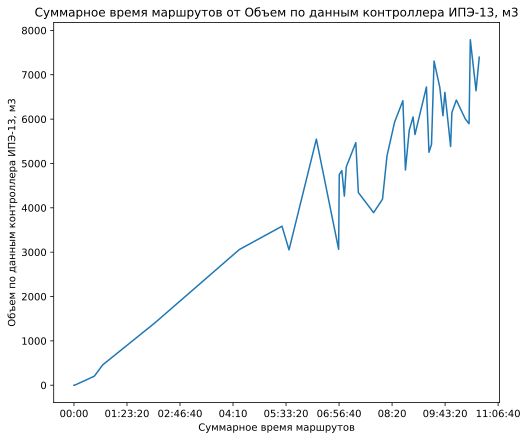

2


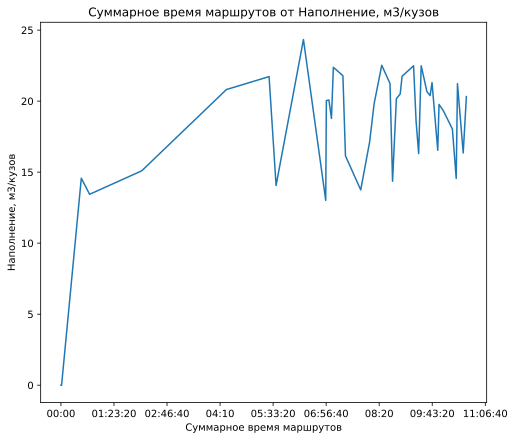

3


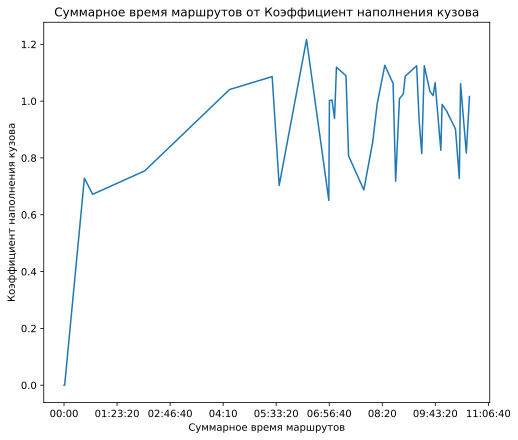

4


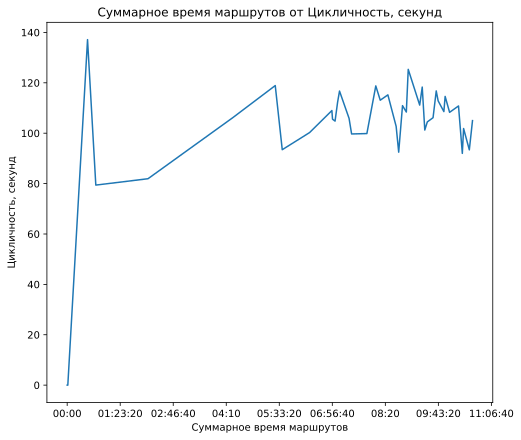

5


In [ ]:
data = df.drop(df.columns[[1]],axis = 1)
for i in range(len(data.columns)):
  df.groupby(df.columns[1])[data.columns[i]].mean().plot()
  plt.title(df.columns[1]+' от '+data.columns[i])
  plt.xlabel(df.columns[1])
  plt.ylabel(data.columns[i])
  plt.show()
  print(i)

## Кол. маршрутов

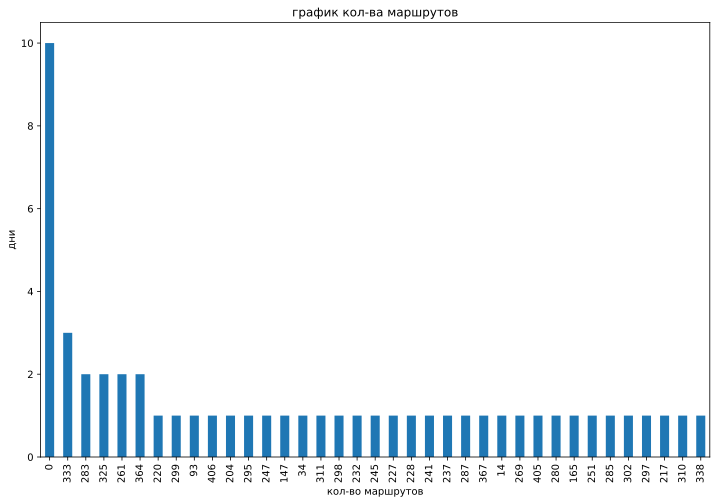

In [ ]:
df['Кол. маршрутов'].value_counts().plot(kind='bar')
plt.title('график кол-ва маршрутов')
plt.xlabel('кол-во маршрутов') #Подписываем ось x
plt.ylabel('дни') #Подписываем ось y
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


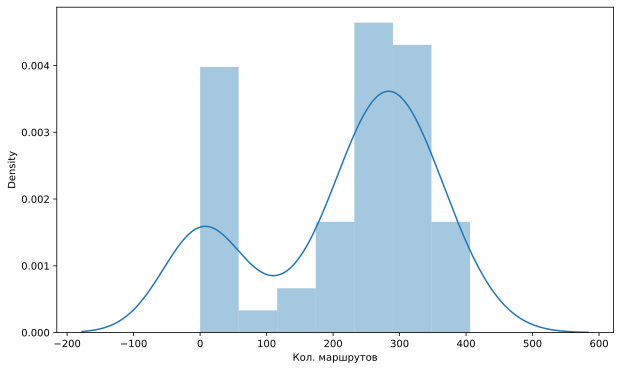

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df.iloc[:,2], bins='auto') # сочетание графиков гистограммы и плавного распределения
plt.show()

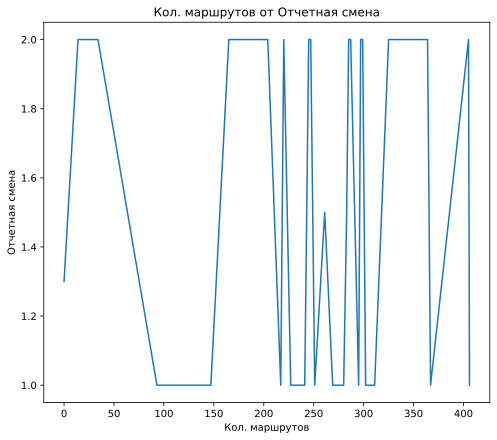

0


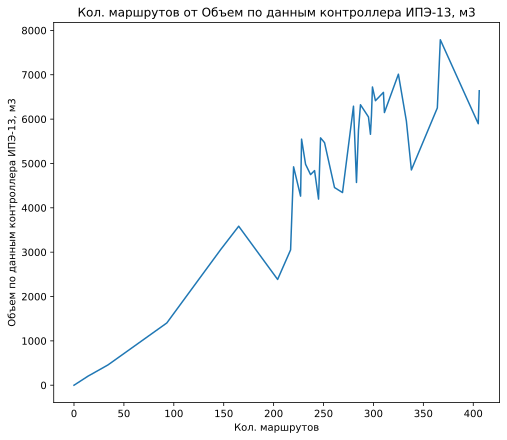

1


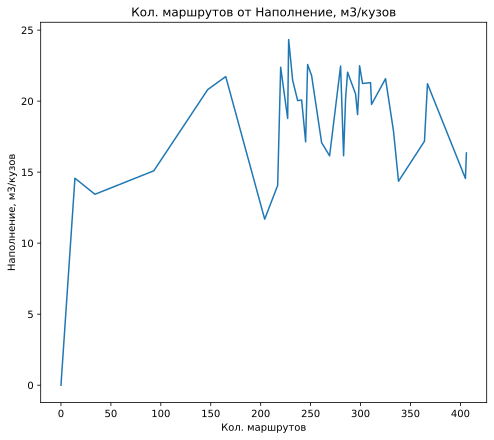

2


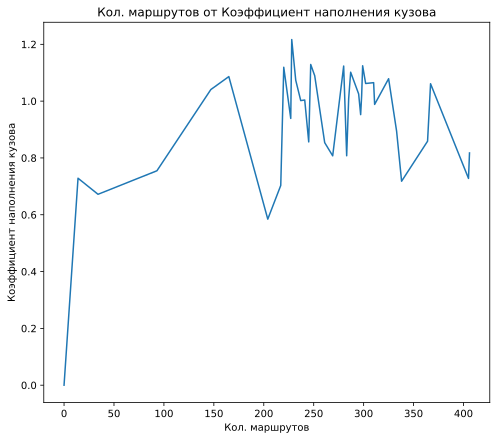

3


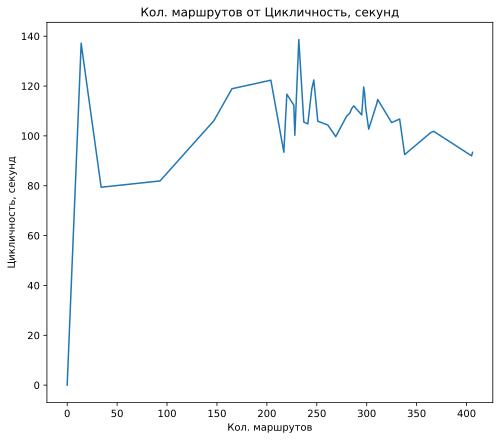

4


In [ ]:
data = df.drop(df.columns[[1,2]],axis = 1)
for i in range(len(data.columns)):
  df.groupby(df.columns[2])[data.columns[i]].mean().plot()
  plt.title(df.columns[2]+' от '+data.columns[i])
  plt.xlabel(df.columns[2])
  plt.ylabel(data.columns[i])
  plt.show()
  print(i)

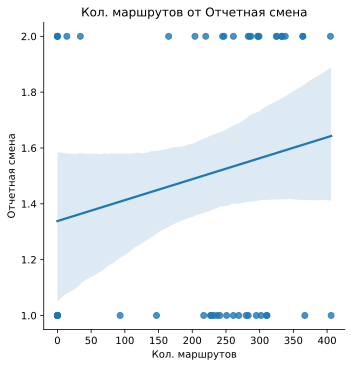

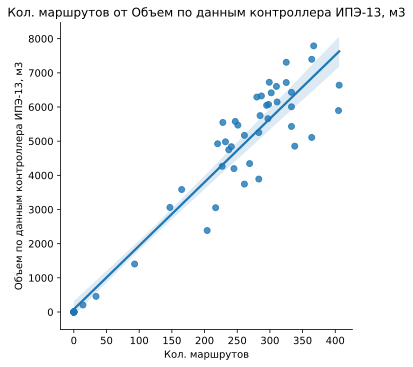

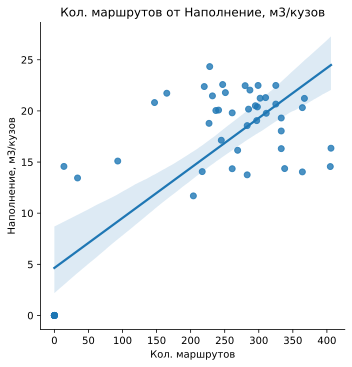

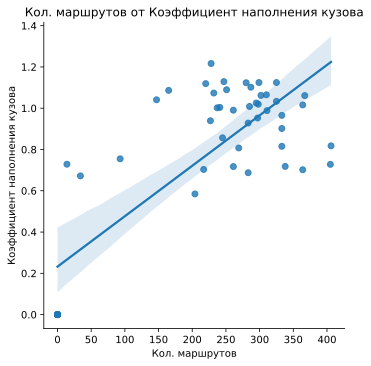

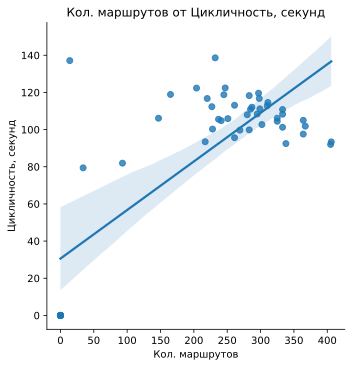

In [ ]:
data = df.drop(df.columns[[1,2]],axis = 1)
for i in range(len(data.columns)):
  sns.lmplot(data=df, x = df.columns[2], y=data.columns[i])
  plt.title(df.columns[2]+' от '+data.columns[i])
  plt.show()

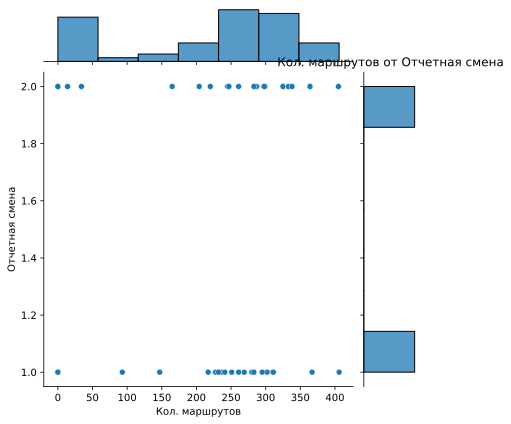

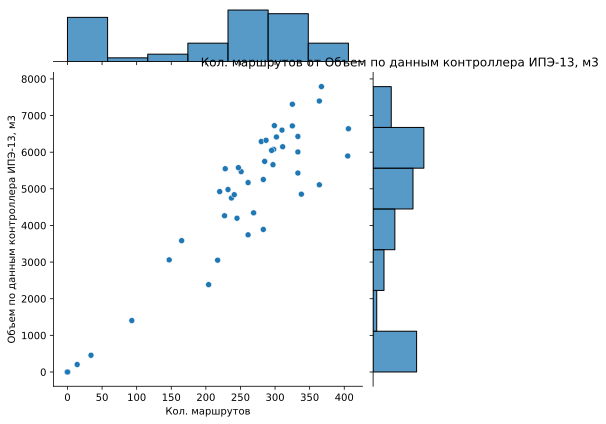

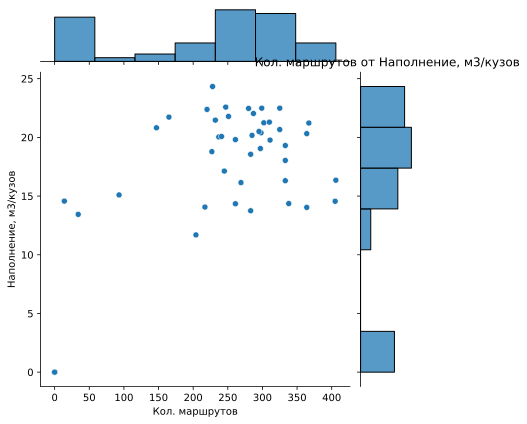

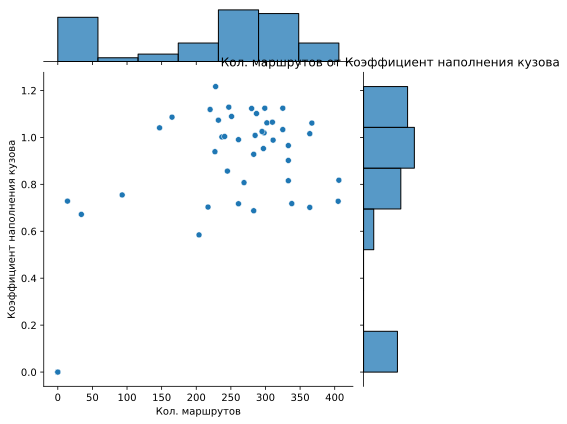

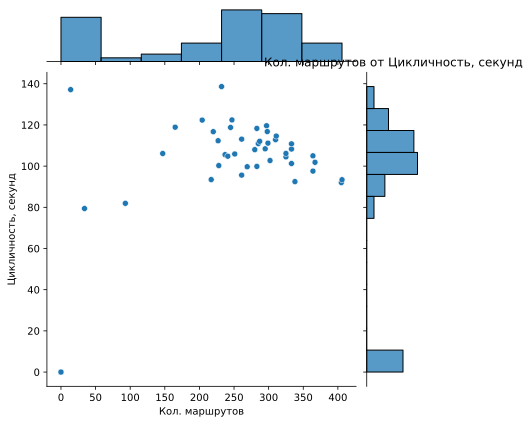

In [ ]:
data = df.drop(df.columns[[1,2]],axis = 1)      # отображает график двух переменных с отдельными гистограммами каждой переменной
                                                       # для отображения плотности значений
for i in range(len(data.columns)):
  sns.jointplot(data=df, x = df.iloc[:,2], y=data.iloc[:,i])
  plt.title(df.columns[2]+' от '+data.columns[i])
  plt.show()

## Объем по данным контроллера ИПЭ-13, м3

(array([12.,  0.,  1.,  0.,  1.,  2.,  1.,  2.,  3.,  7.,  6.,  6.,  8.,
         0.,  3.]),
 array([   0.        ,  519.26666667, 1038.53333333, 1557.8       ,
        2077.06666667, 2596.33333333, 3115.6       , 3634.86666667,
        4154.13333333, 4673.4       , 5192.66666667, 5711.93333333,
        6231.2       , 6750.46666667, 7269.73333333, 7789.        ]),
 <a list of 15 Patch objects>)

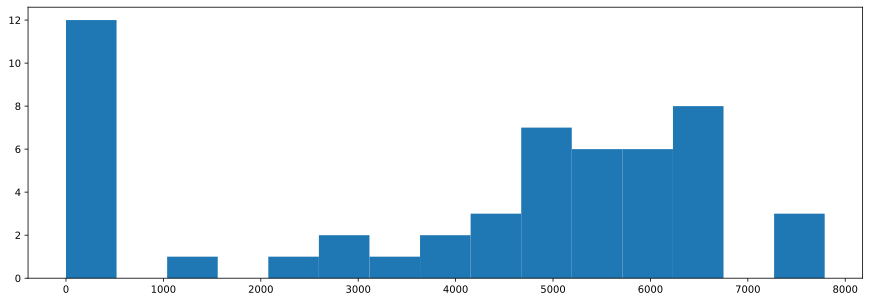

In [ ]:
plt.figure(figsize = (15, 5)) #Указываем размер полотна
plt.hist(df['Объем по данным контроллера ИПЭ-13, м3'], bins = 15) #Выводим гистограмму по датам

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


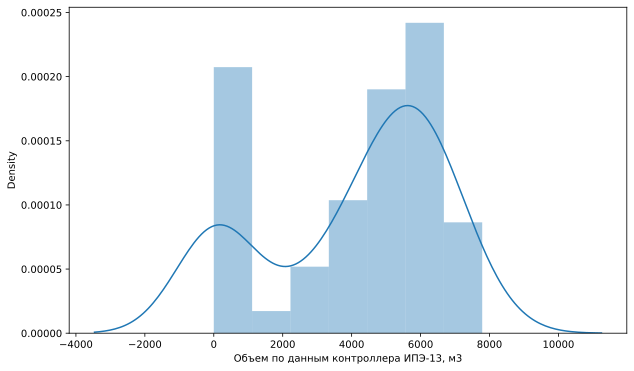

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df.iloc[:,3], bins='auto') # сочетание графиков гистограммы и плавного распределения
plt.show()

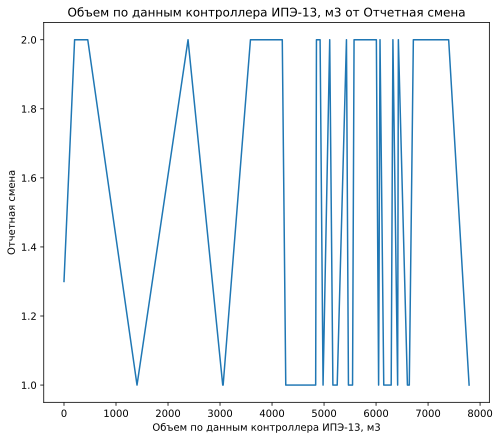

0


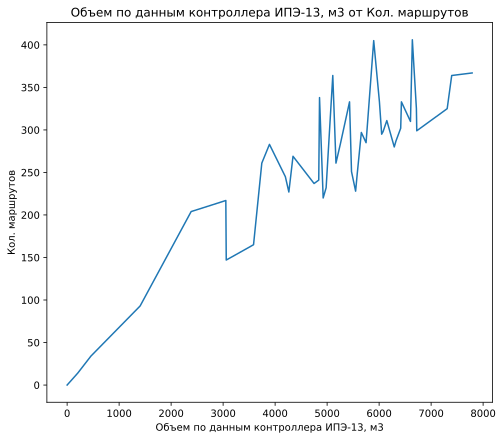

1


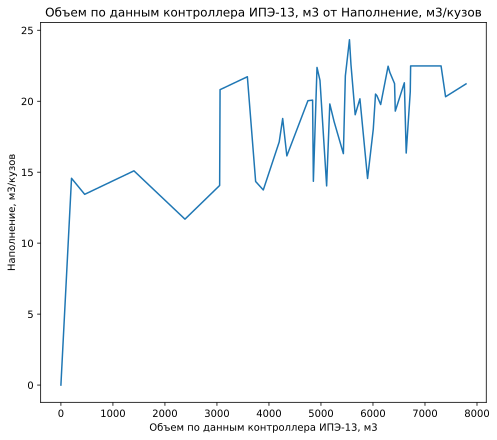

2


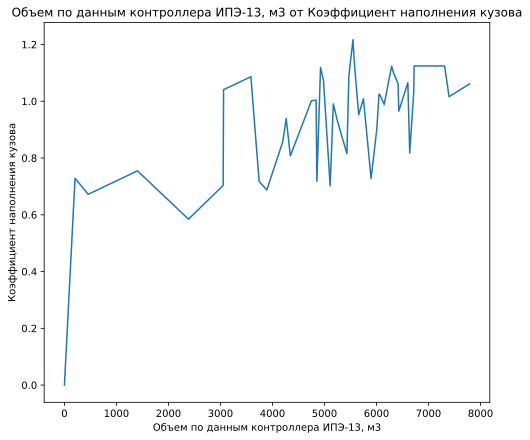

3


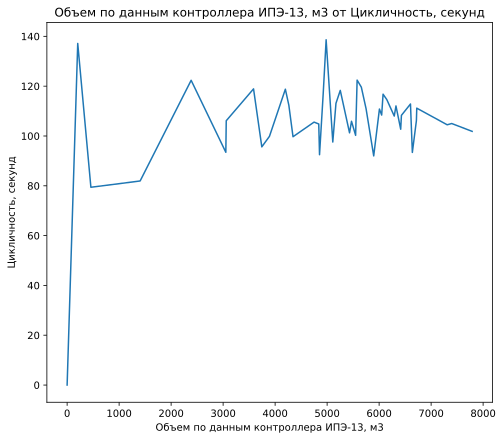

4


In [ ]:
data = df.drop(df.columns[[1,3]],axis = 1)
for i in range(len(data.columns)):
  df.groupby(df.columns[3])[data.columns[i]].mean().plot()
  plt.title(df.columns[3]+' от '+data.columns[i])
  plt.xlabel(df.columns[3])
  plt.ylabel(data.columns[i])
  plt.show()
  print(i)

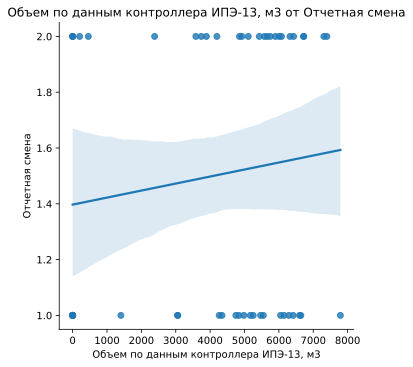

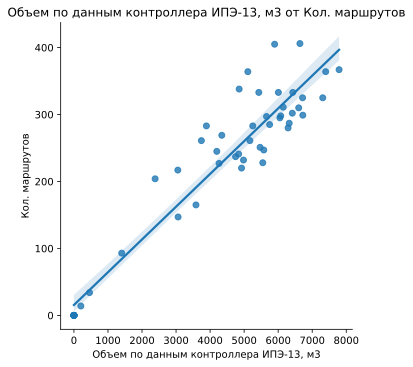

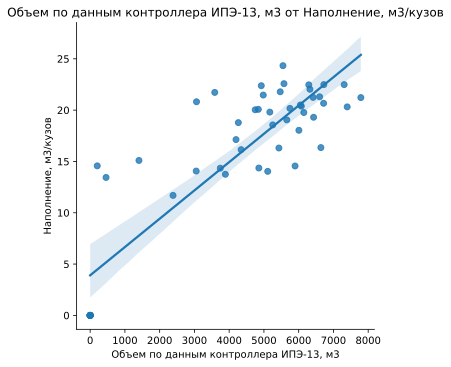

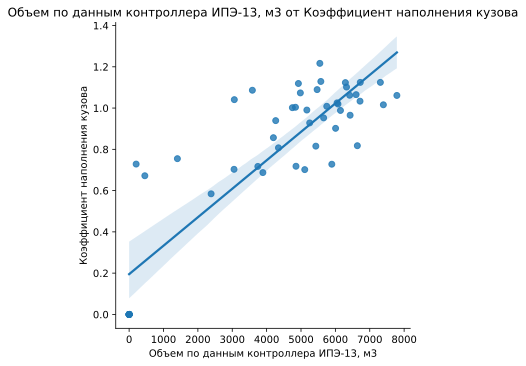

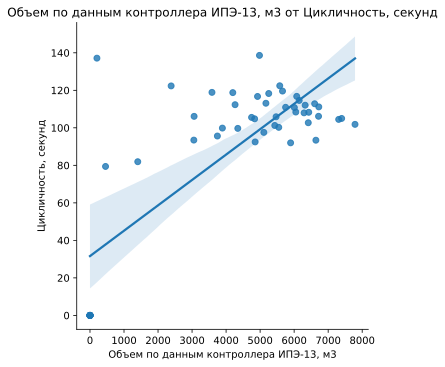

In [ ]:
data = df.drop(df.columns[[1,3]],axis = 1)
for i in range(len(data.columns)):
  sns.lmplot(data=df, x = df.columns[3], y=data.columns[i])
  plt.title(df.columns[3]+' от '+data.columns[i])
  plt.show()

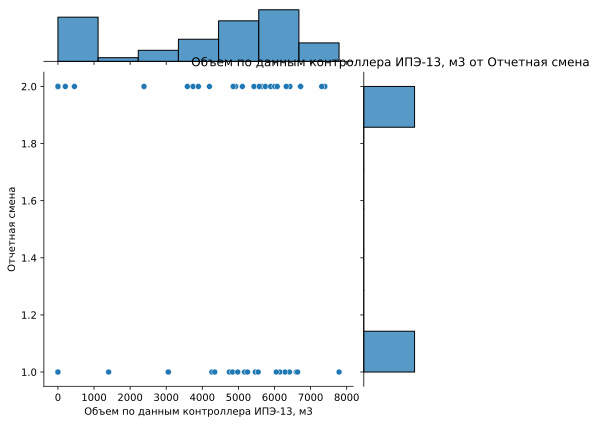

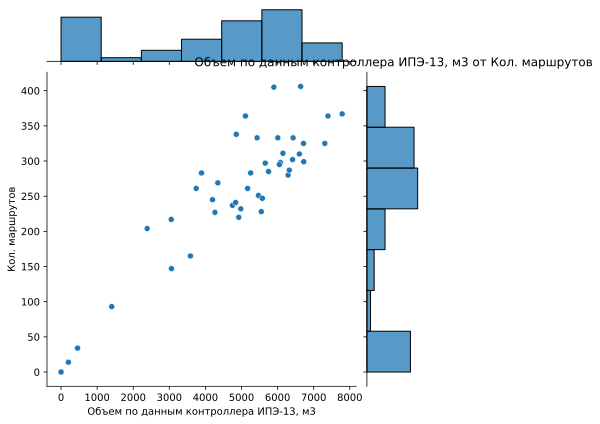

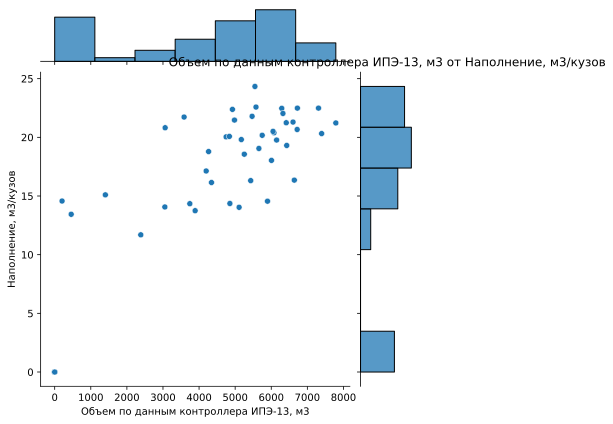

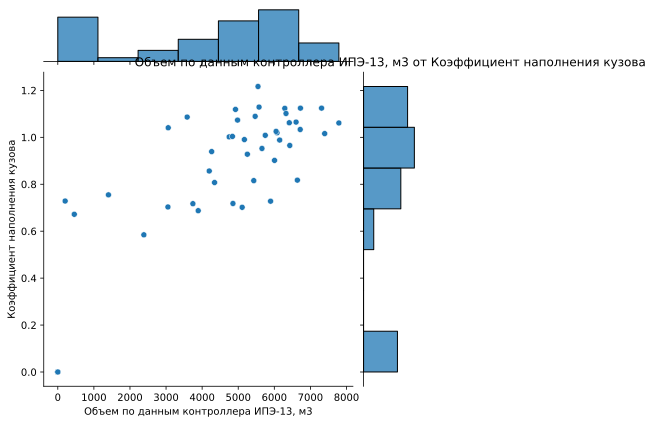

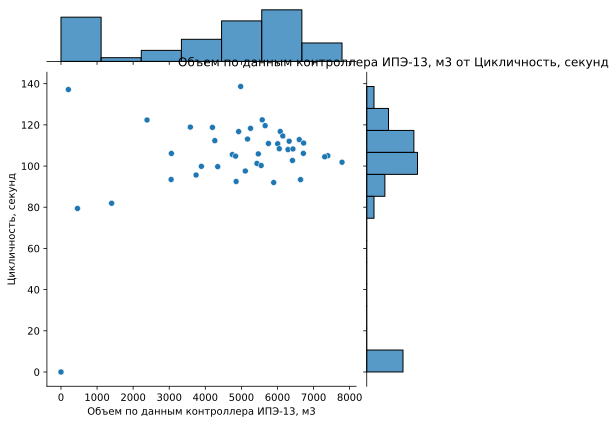

In [ ]:
data = df.drop(df.columns[[1,3]],axis = 1)      # отображает график двух переменных с отдельными гистограммами каждой переменной
                                                       # для отображения плотности значений
for i in range(len(data.columns)):
  sns.jointplot(data=df, x = df.iloc[:,3], y=data.iloc[:,i])
  plt.title(df.columns[3]+' от '+data.columns[i])
  plt.show()

## Наполнение, м3/кузов

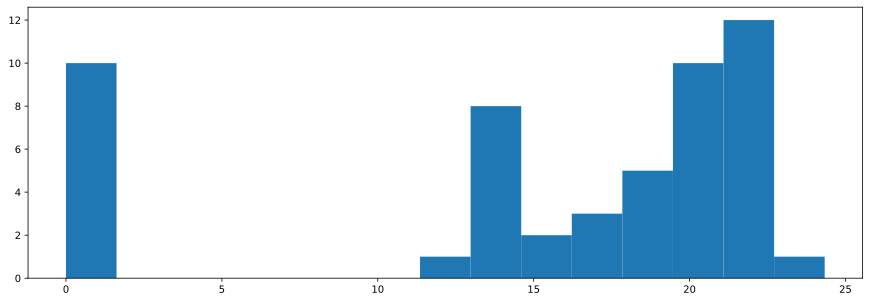

In [ ]:
plt.figure(figsize = (15, 5)) #Указываем размер полотна
plt.hist(df['Наполнение, м3/кузов'], bins = 15) #Выводим гистограмму по датам
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


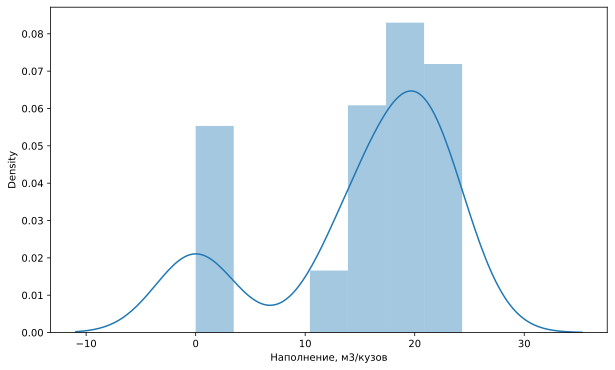

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df.iloc[:,4], bins='auto') # сочетание графиков гистограммы и плавного распределения
plt.show()

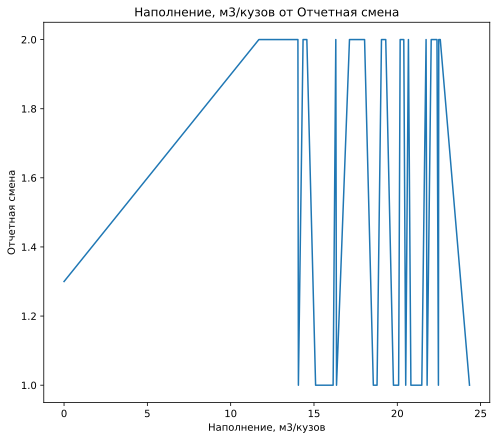

0


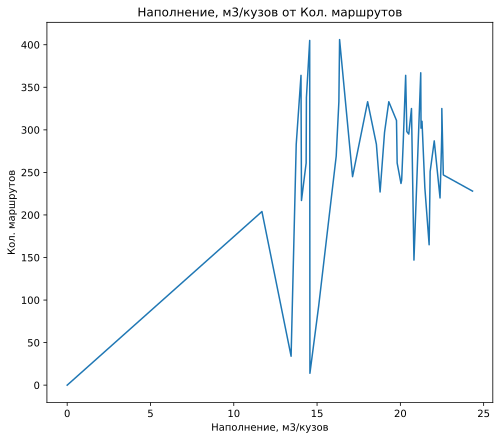

1


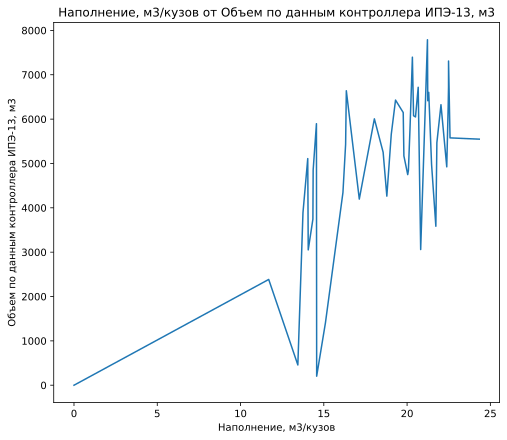

2


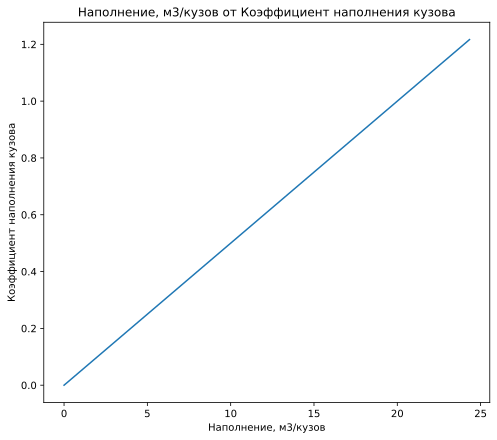

3


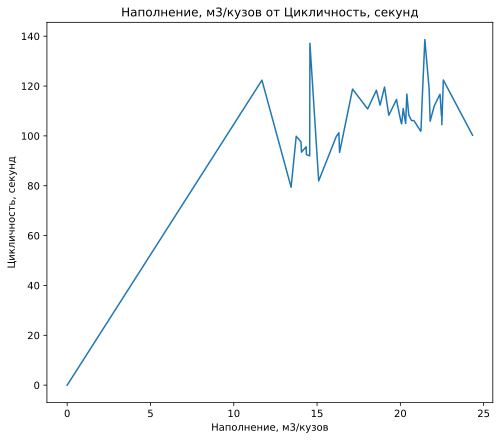

4


In [ ]:
data = df.drop(df.columns[[1,4]],axis = 1)
for i in range(len(data.columns)):
  df.groupby(df.columns[4])[data.columns[i]].mean().plot()
  plt.title(df.columns[4]+' от '+data.columns[i])
  plt.xlabel(df.columns[4])
  plt.ylabel(data.columns[i])
  plt.show()
  print(i)

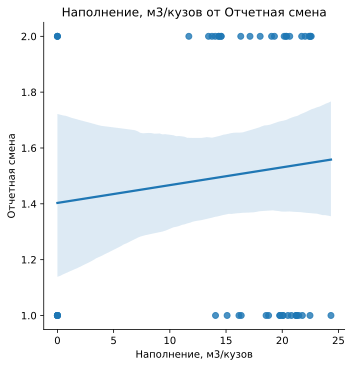

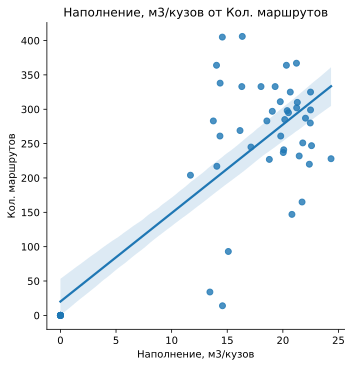

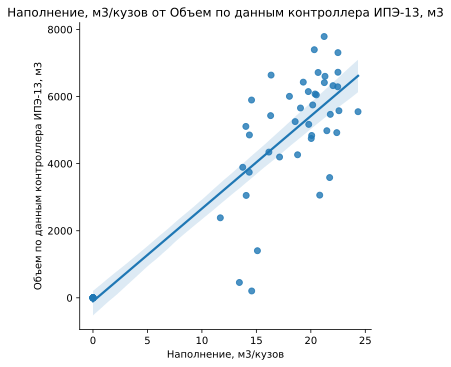

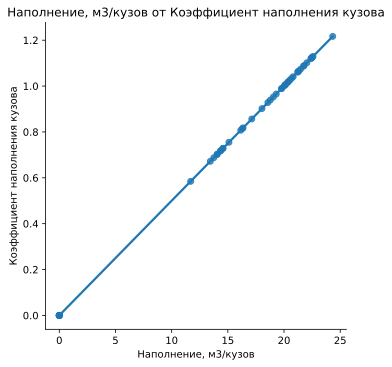

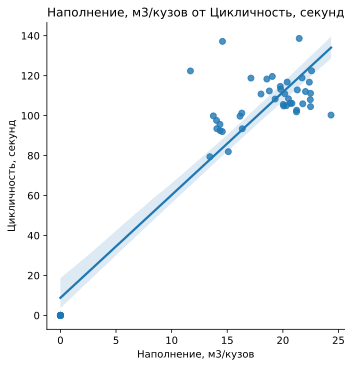

In [ ]:
data = df.drop(df.columns[[1,4]],axis = 1)
for i in range(len(data.columns)):
  sns.lmplot(data=df, x = df.columns[4], y=data.columns[i])
  plt.title(df.columns[4]+' от '+data.columns[i])
  plt.show()

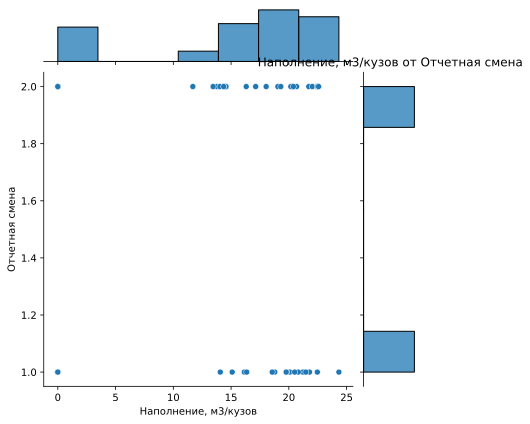

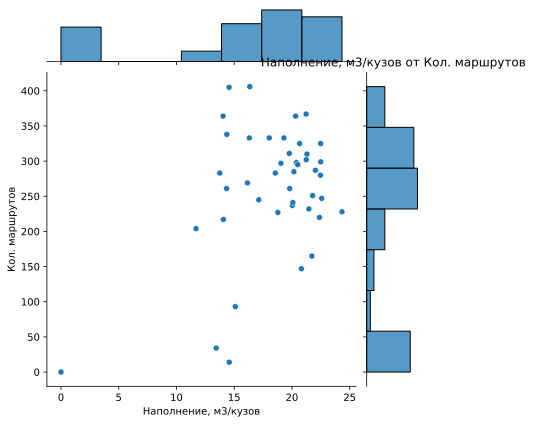

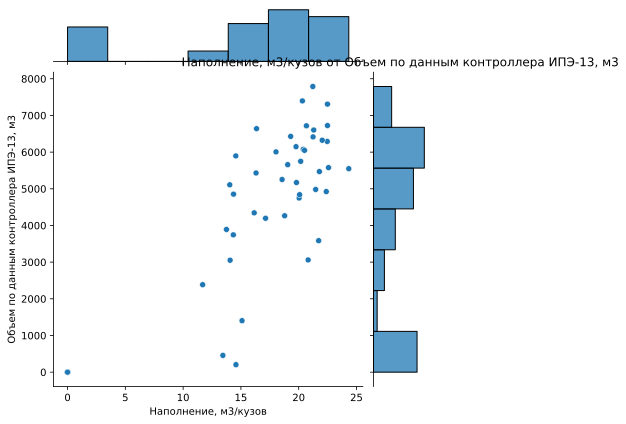

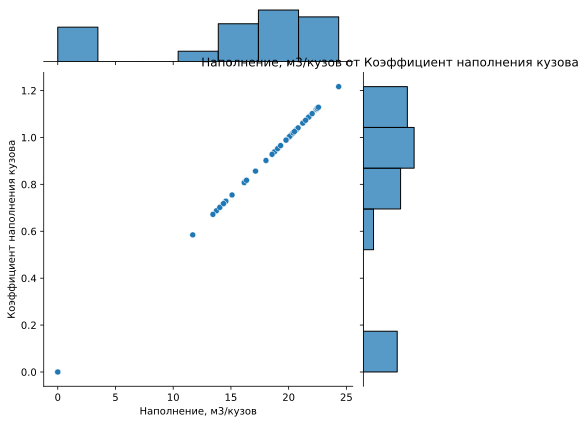

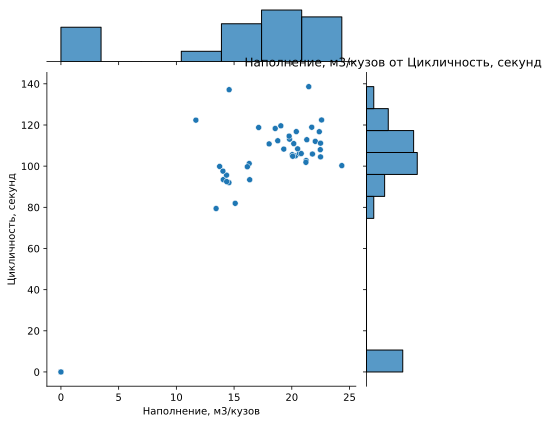

In [ ]:
data = df.drop(df.columns[[1,4]],axis = 1)      # отображает график двух переменных с отдельными гистограммами каждой переменной
                                                       # для отображения плотности значений
for i in range(len(data.columns)):
  sns.jointplot(data=df, x = df.iloc[:,4], y=data.iloc[:,i])
  plt.title(df.columns[4]+' от '+data.columns[i])
  plt.show()

## Коэффициент наполнения кузова

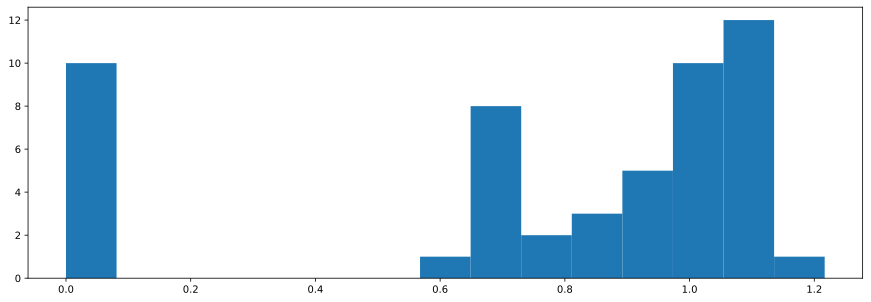

In [ ]:
plt.figure(figsize = (15, 5)) #Указываем размер полотна
plt.hist(df['Коэффициент наполнения кузова'], bins = 15) #Выводим гистограмму по месяцам
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


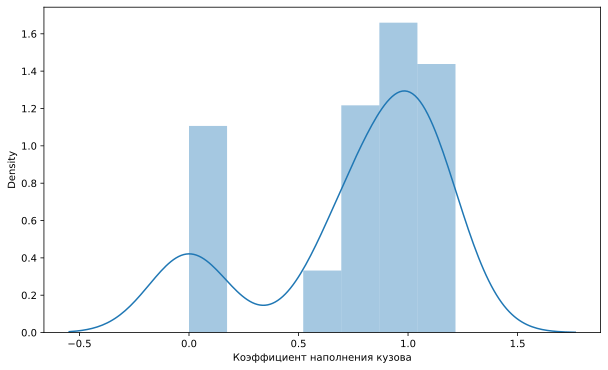

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df.iloc[:,5], bins='auto') # сочетание графиков гистограммы и плавного распределения
plt.show()

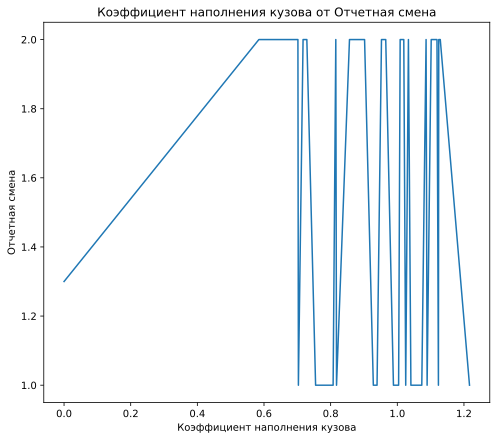

0


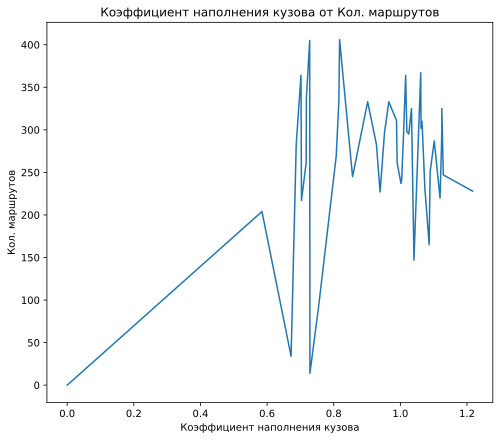

1


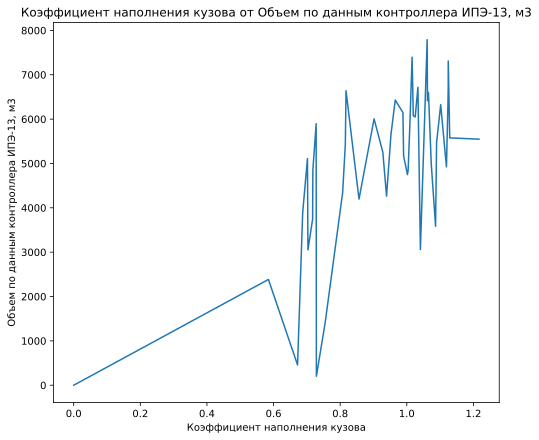

2


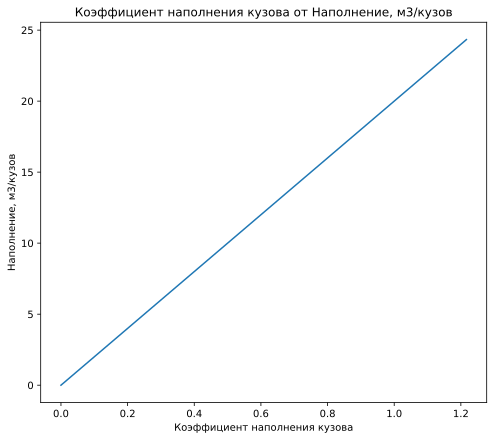

3


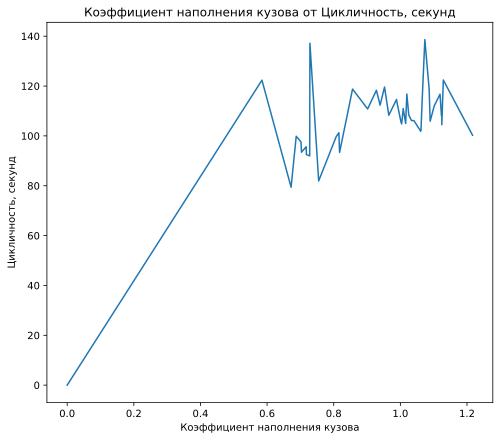

4


In [ ]:
data = df.drop(df.columns[[1,5]],axis = 1)
for i in range(len(data.columns)):
  df.groupby(df.columns[5])[data.columns[i]].mean().plot()
  plt.title(df.columns[5]+' от '+data.columns[i])
  plt.xlabel(df.columns[5])
  plt.ylabel(data.columns[i])
  plt.show()
  print(i)

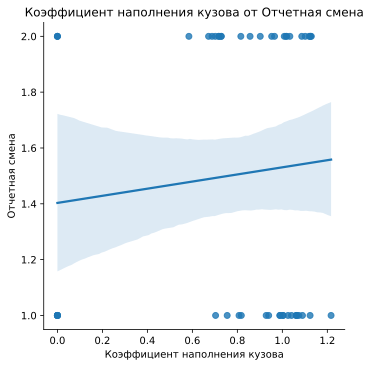

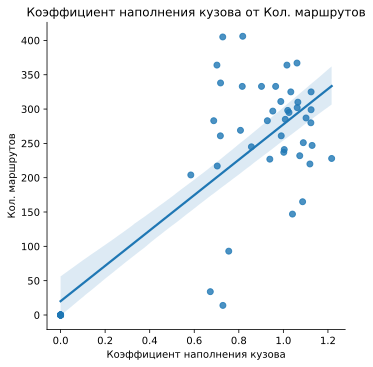

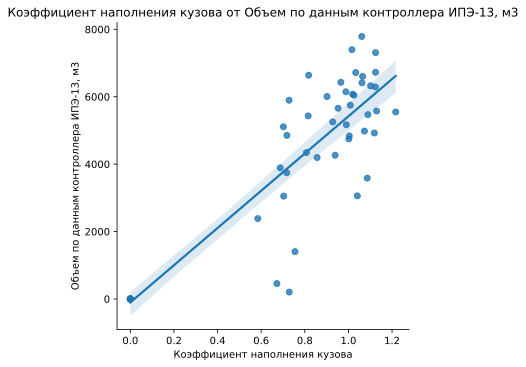

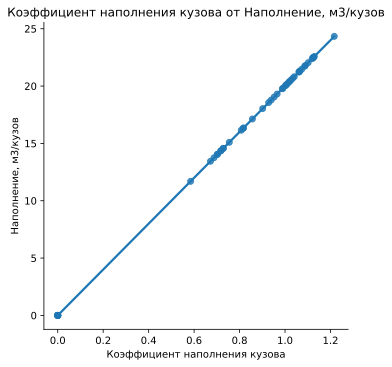

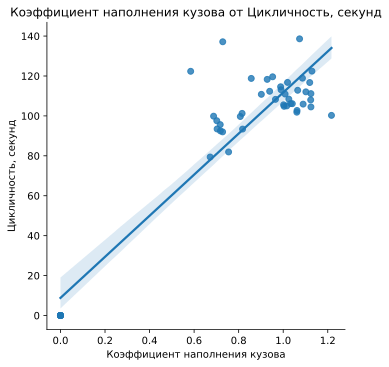

In [ ]:
data = df.drop(df.columns[[1,5]],axis = 1)
for i in range(len(data.columns)):
  sns.lmplot(data=df, x = df.columns[5], y=data.columns[i])
  plt.title(df.columns[5]+' от '+data.columns[i])
  plt.show()

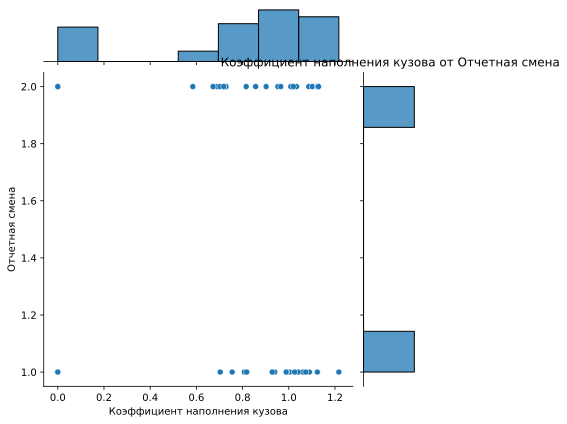

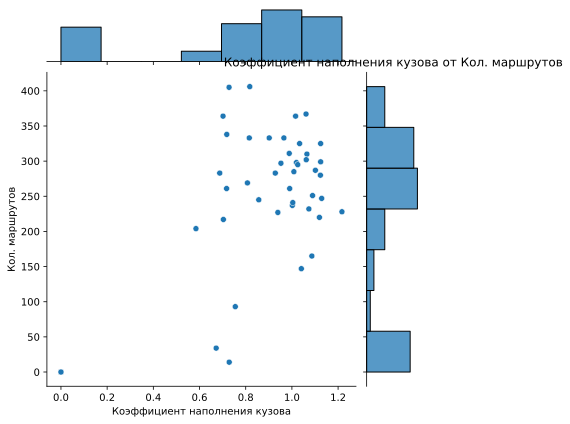

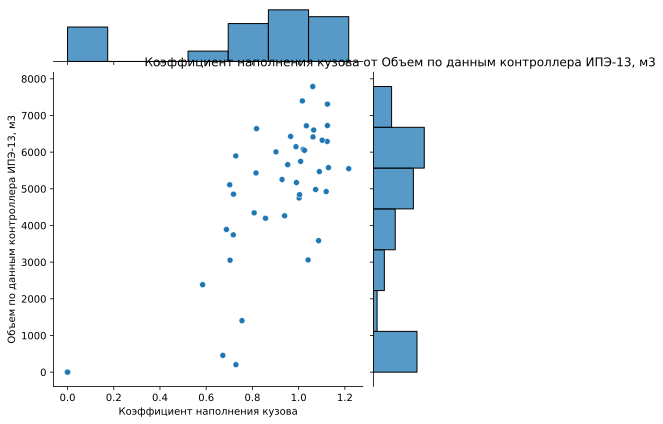

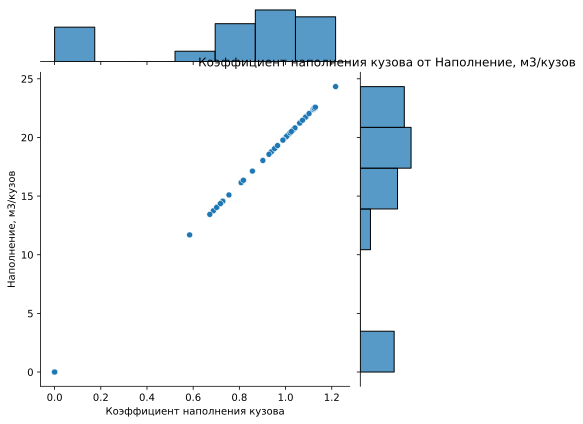

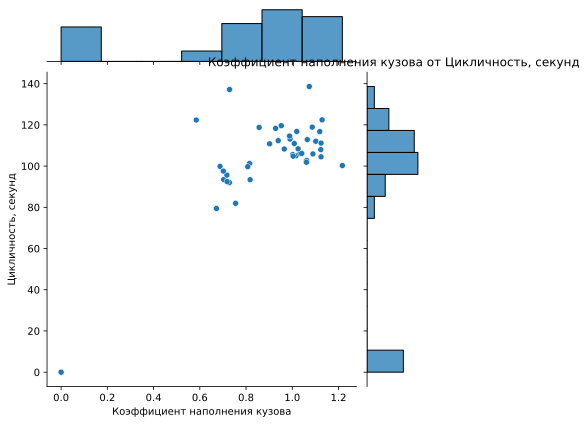

In [ ]:
data = df.drop(df.columns[[1,5]],axis = 1)      # отображает график двух переменных с отдельными гистограммами каждой переменной
                                                       # для отображения плотности значений
for i in range(len(data.columns)):
  sns.jointplot(data=df, x = df.iloc[:,5], y=data.iloc[:,i])
  plt.title(df.columns[5]+' от '+data.columns[i])
  plt.show()

## Цикличность, секунд

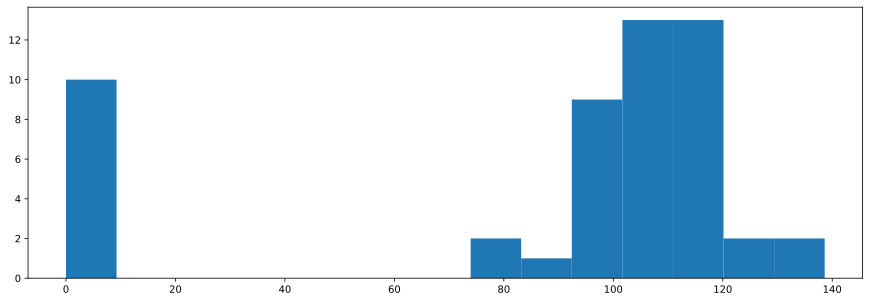

In [ ]:
plt.figure(figsize = (15, 5)) #Указываем размер полотна
plt.hist(df['Цикличность, секунд'], bins = 15) #Выводим гистограмму
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


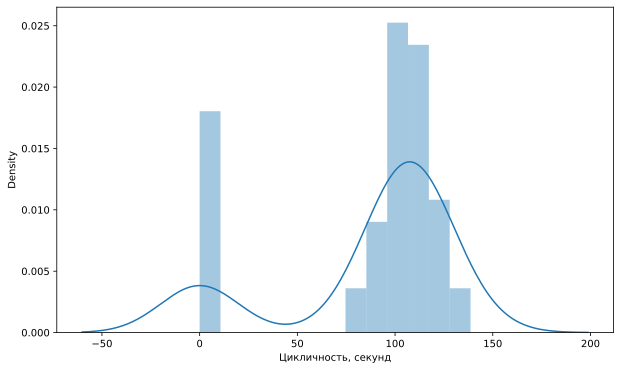

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df.iloc[:,6], bins='auto') # сочетание графиков гистограммы и плавного распределения
plt.show()

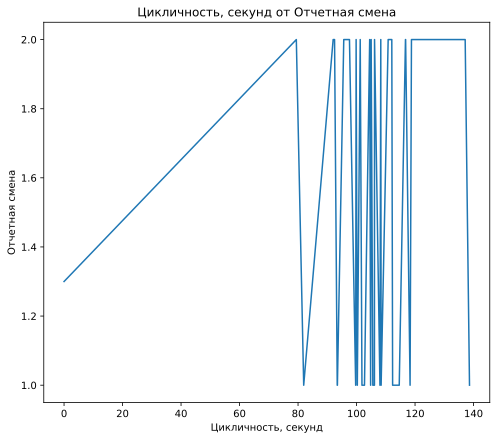

0


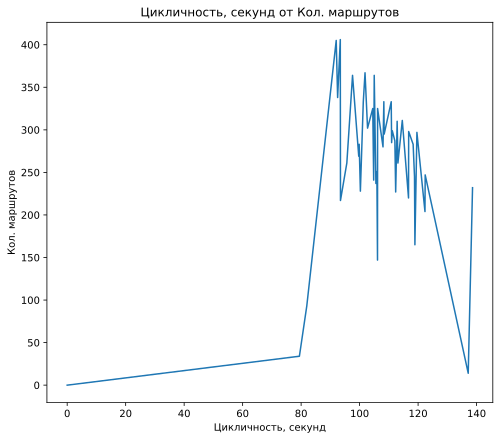

1


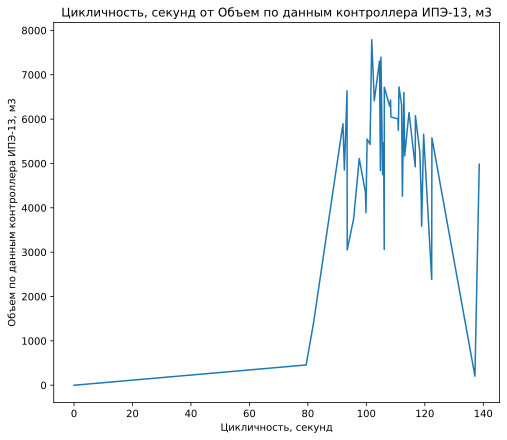

2


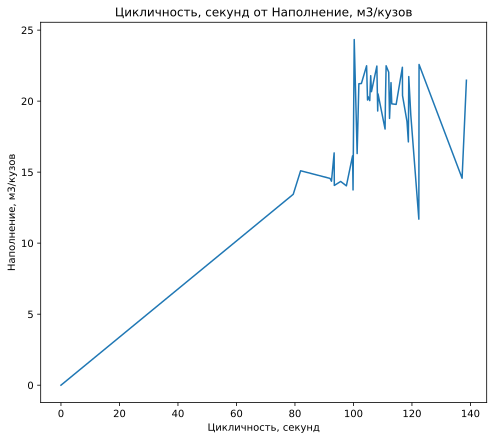

3


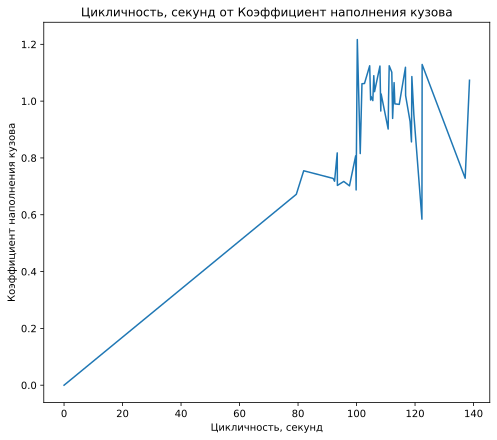

4


In [ ]:
data = df.drop(df.columns[[1,6]],axis = 1)
for i in range(len(data.columns)):
  df.groupby(df.columns[6])[data.columns[i]].mean().plot()
  plt.title(df.columns[6]+' от '+data.columns[i])
  plt.xlabel(df.columns[6])
  plt.ylabel(data.columns[i])
  plt.show()
  print(i)

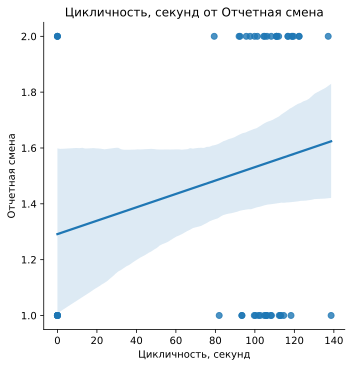

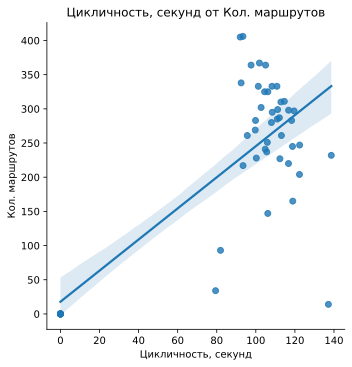

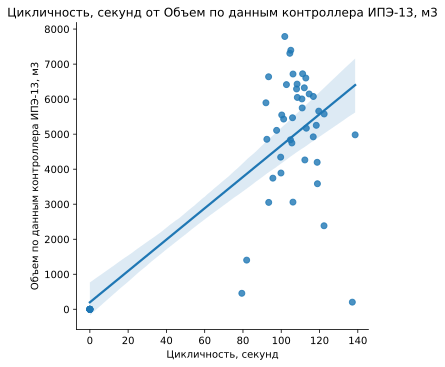

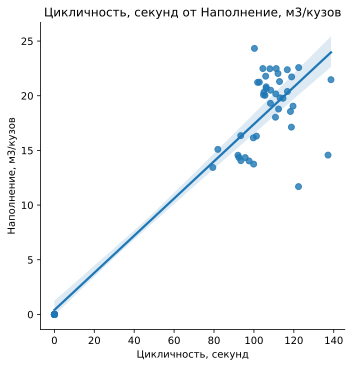

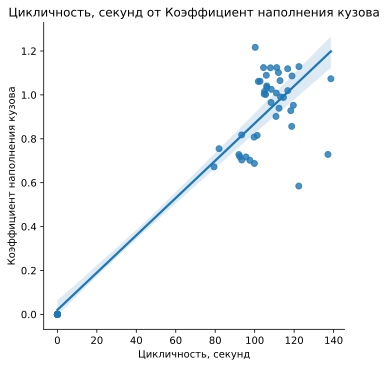

In [ ]:
data = df.drop(df.columns[[1,6]],axis = 1)
for i in range(len(data.columns)):
  sns.lmplot(data=df, x = df.columns[6], y=data.columns[i])
  plt.title(df.columns[6]+' от '+data.columns[i])
  plt.show()

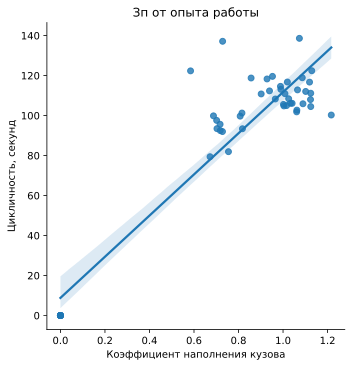

In [ ]:
sns.lmplot(data=df, x = df.columns[5], y=df.columns[6])
plt.title('Зп от опыта работы')
plt.show()

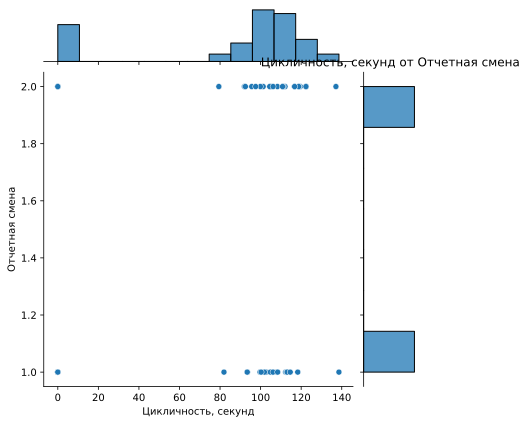

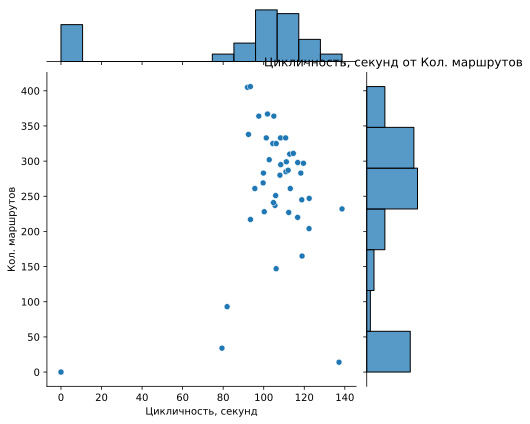

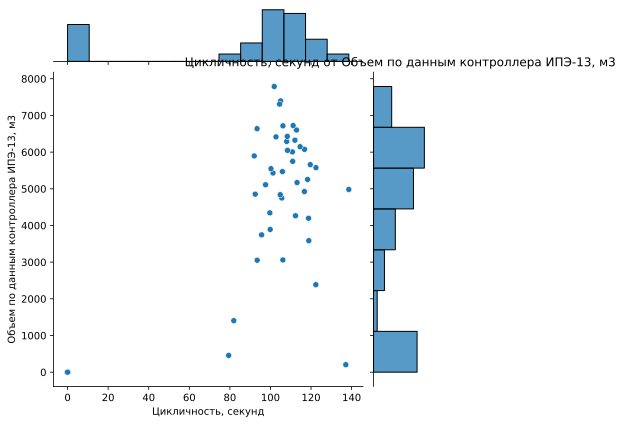

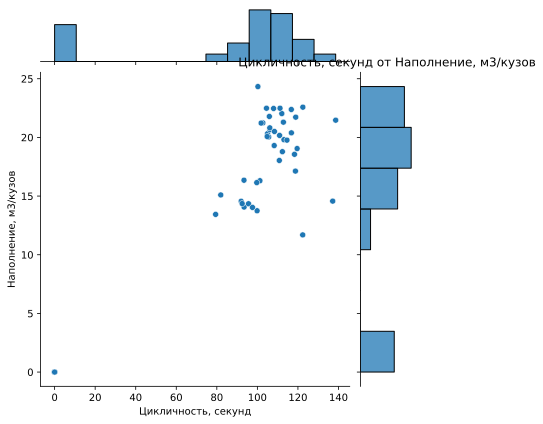

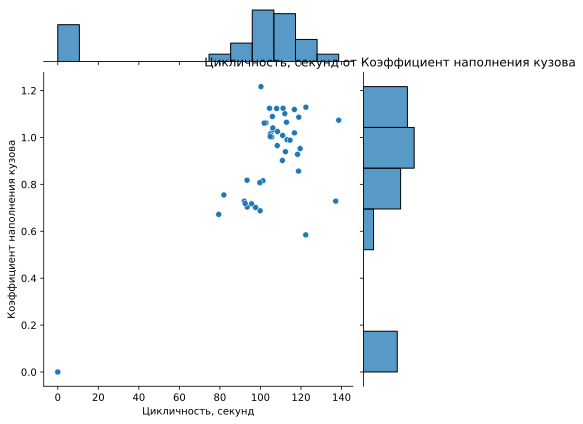

In [ ]:
data = df.drop(df.columns[[1,6]],axis = 1)      # отображает график двух переменных с отдельными гистограммами каждой переменной
                                                       # для отображения плотности значений
for i in range(len(data.columns)):
  sns.jointplot(data=df, x = df.iloc[:,6], y=data.iloc[:,i])
  plt.title(df.columns[6]+' от '+data.columns[i])
  plt.show()

# Визуализация данных

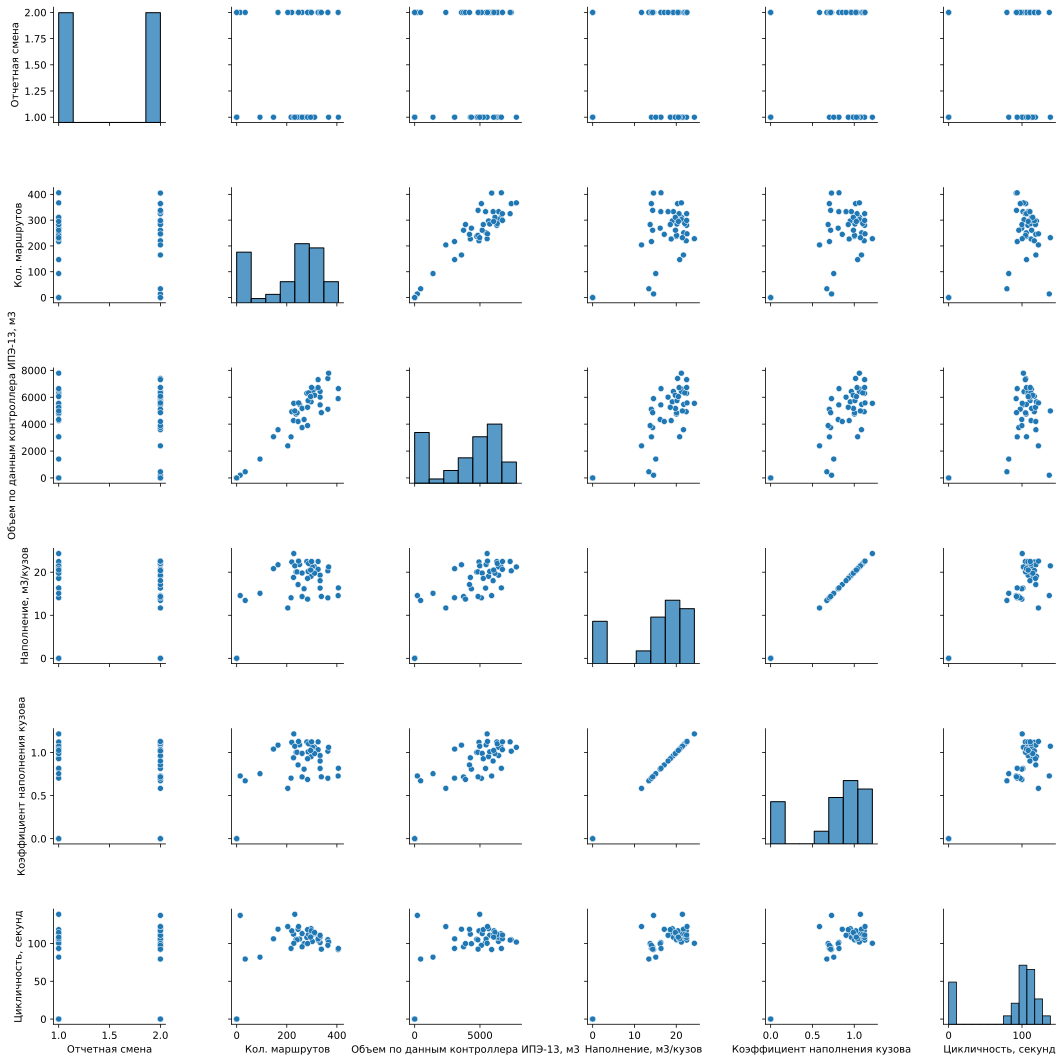

In [ ]:
sns.pairplot(df.drop(df.columns[1],axis = 1)) # отображает парные графики всех имеющихся категорий данных
                                                            # в нашем случае по столбцам
plt.show()

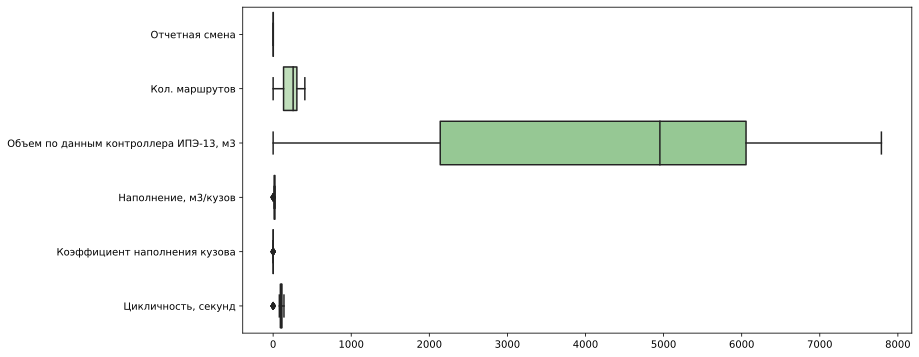

In [ ]:
# график boxplot показывает средний, нижний и верхний квартили,
# минимальное и максимальное значение выборки и выбросы
plt.figure(figsize=(12,6))
sns.boxplot(data=df, palette=sns.color_palette('Greens'), orient='h')
plt.show()

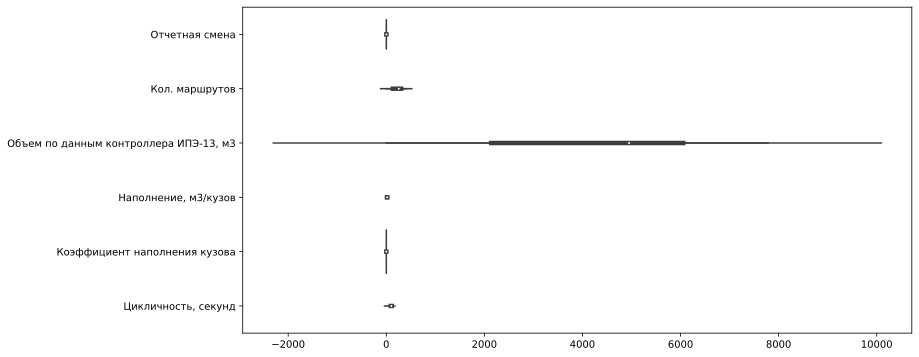

In [ ]:
plt.figure(figsize=(12,6))
# график violinplot показывает то же самое, что и boxplot, только
# с плавной плотностью распределения
sns.violinplot(data=df, orient='h')
plt.show()

# Матрица корреляций

In [ ]:
df.corr()

Отчетная смена  Кол. маршрутов  \
Отчетная смена                                1.000000        0.193876   
Кол. маршрутов                                0.193876        1.000000   
Объем по данным контроллера ИПЭ-13, м3        0.126622        0.953754   
Наполнение, м3/кузов                          0.101488        0.793249   
Коэффициент наполнения кузова                 0.101488        0.793249   
Цикличность, секунд                           0.209969        0.771271   

                                        Объем по данным контроллера ИПЭ-13, м3  \
Отчетная смена                                                        0.126622   
Кол. маршрутов                                                        0.953754   
Объем по данным контроллера ИПЭ-13, м3                                1.000000   
Наполнение, м3/кузов                                                  0.872805   
Коэффициент наполнения кузова                                         0.872805   
Цикличность, секунд                                                   0.778080   

                                        Наполнение, м3/кузов  \
Отчетная смена                                      0.101488   
Кол. маршрутов                                      0.793249   
Объем по данным контроллера ИПЭ-13, м3              0.872805   
Наполнение, м3/кузов                                1.000000   
Коэффициент наполнения кузова                       1.000000   
Цикличность, секунд                                 0.935391   

                                        Коэффициент наполнения кузова  \
Отчетная смена                                               0.101488   
Кол. маршрутов                                               0.793249   
Объем по данным контроллера ИПЭ-13, м3                       0.872805   
Наполнение, м3/кузов                                         1.000000   
Коэффициент наполнения кузова                                1.000000   
Цикличность, секунд                                          0.935391   

                                        Цикличность, секунд  
Отчетная смена                                     0.209969  
Кол. маршрутов                                     0.771271  
Объем по данным контроллера ИПЭ-13, м3             0.778080  
Наполнение, м3/кузов                               0.935391  
Коэффициент наполнения кузова                      0.935391  
Цикличность, секунд                                1.000000

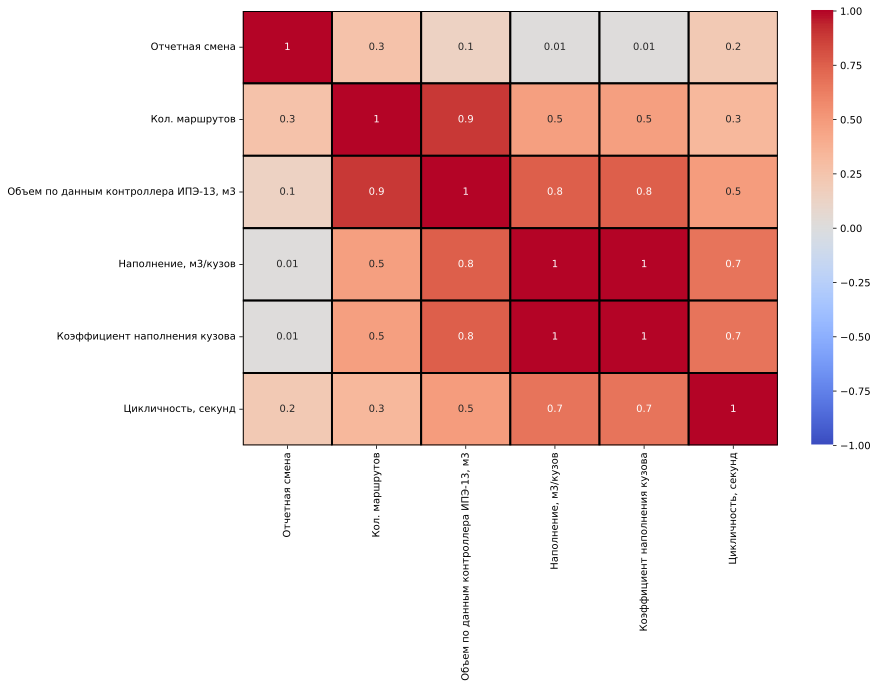

In [ ]:
rcParams['figure.figsize'] = 12, 8 # увеличим размер графиков
# Метод, подсчитывающий попарную корреляцию для элементов.
corr_matrix = df.corr('spearman')
# Можно указать в параметрах способ подсчета.
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')

# Выводы:

Судя по матрице корреляций и анализу графиков,  можно сделать следующие выводы:
1. 100% корреляция у параметров "Наполнение, м3/кузов" и "Коэффициент наполнения кузова". Эти параметры максимально зависимы друг от друга. Вероятно "Коэффициент наполнения кузова" это стандартизированный столбец "Наполнение, м3/кузов".

2. Сильно зависимы (90%) столбцы "Кол. маршрутов" и "Объем по данным контроллера ИПЭ-13, м3". Соответственно, чем больше маршрутов, тем больше будет параметр "Объем по данным контроллера ИПЭ-13, м3".

3. Столбец "Объем по данным контроллера ИПЭ-13, м3"  на 80% зависим от столбоцов: "Наполнение, м3/кузов" и "Коэффициент наполнения кузова".

4. Столбец "Цикличность, секунд"  на 70% зависим от  столбцов: "Наполнение, м3/кузов" и "Коэффициент наполнения кузова".

5. Чем больше Суммарное время маршрутов, тем больше Кол. маршрутов.

6. Чем больше Суммарное время маршрутов, тем больше Объем по данным контроллера ИПЭ-13, м3.

Таким образом, самыми интересными столбцами для анализа являются: Кол. маршрутов, Объем по данным контроллера ИПЭ-13, м3, Наполнение, м3/кузов, Коэффициент наполнения кузова, Цикличность, секунд.